# Import Necessary Libraries

In [122]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
plt.figure(figsize= (7,12), dpi=300)

<Figure size 2100x3600 with 0 Axes>

<Figure size 2100x3600 with 0 Axes>

# Assign Path Variable to Path of Data

In [124]:
base_path = rf'C:\Users\anusi\OneDrive\Desktop\python_project\SalesData'

# All file show on console screen

In [125]:
files = os.listdir(base_path)
print(files)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


# Merging 12 months of sales data in a single file:

In [126]:
edf = pd.DataFrame()
for file in files:
    df = pd.read_csv(rf'{base_path}\{file}')
    edf= pd.concat([edf,df])
print(edf)





      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

# convert this file to excel


In [127]:
edf.to_excel(rf"c:\Users\anusi\OneDrive\Desktop\python_project\sales_analysis\product.xlsx")

# delete nan value

In [128]:
edf.dropna(inplace=True)

edf.shape

(186305, 6)

# delete duplicate values

In [129]:
edf.drop_duplicates(inplace=True)
edf.drop_duplicates(inplace = True,keep=False)
edf=edf.loc[edf['Quantity Ordered'] != 'Quantity Ordered']
edf




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [130]:
edf['Quantity Ordered']=edf['Quantity Ordered'].astype(int)
edf['Price Each']=edf['Price Each'].astype(float)
edf['Order Date']=pd.to_datetime(edf['Order Date'])
edf.info()


C:\Users\anusi\AppData\Local\Temp\ipykernel_16544\2760976232.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  edf['Order Date']=pd.to_datetime(edf['Order Date'])


<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int32         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB


# featuring engeering Add Month coloumn

In [131]:
edf['month'] = edf['Order Date'].dt.month_name()
edf['month in num'] = edf['Order Date'].dt.month
# edf['month']=edf['month'].str[0:3]
edf['payment'] = edf['Quantity Ordered'] * edf['Price Each']
edf




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,month in num,payment
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,4,11.99
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,9,8.97
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,9,700.00
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,9,379.99


# What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [132]:
mdf=edf.groupby(['month in num','month']).agg(
    total_sales = ('payment','sum')
)
mdf.reset_index(inplace=True)
mdf

,month in num,month,total_sales
0,1,January,1821413.16
1,2,February,2200078.08
2,3,March,2804973.35
3,4,April,3389217.98
4,5,May,3150616.23
5,6,June,2576280.15
6,7,July,2646461.32
7,8,August,2241083.37
8,9,September,2094465.69
9,10,October,3734777.86


# Ploting

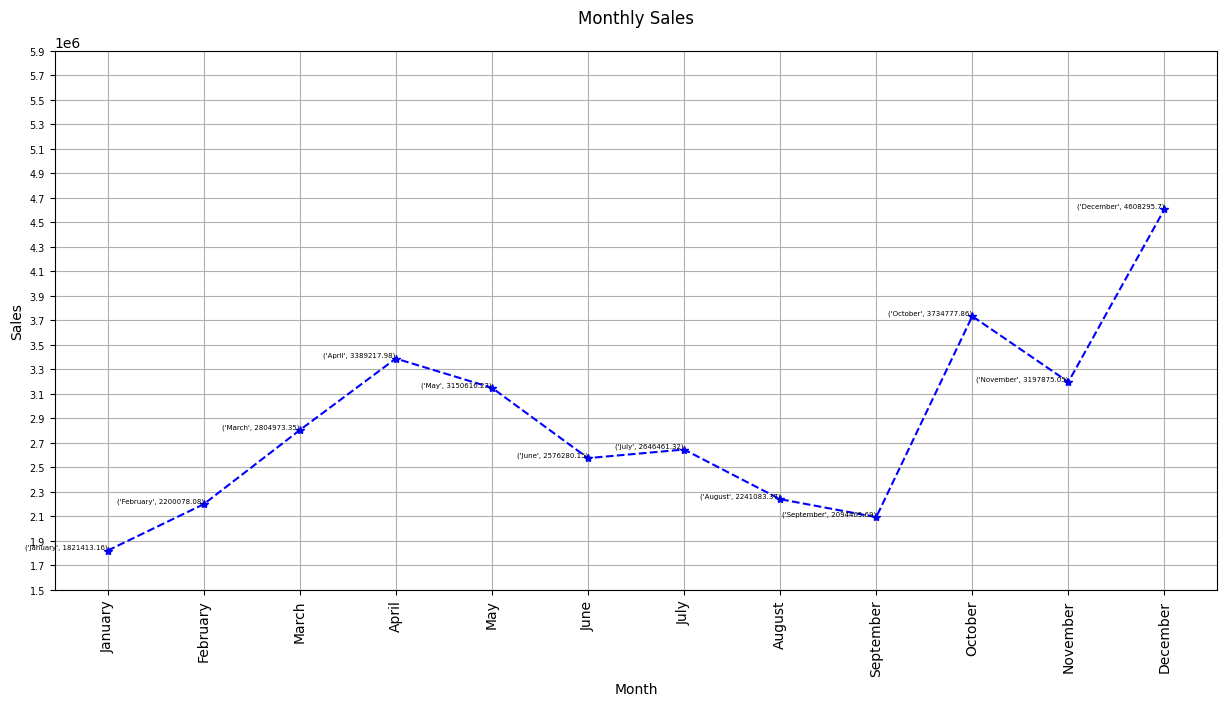

In [133]:
plt.figure(figsize=(15,7))
plt.plot(mdf['month'],mdf['total_sales'],'b*--')
plt.title('Monthly Sales',pad=20)
plt.xlabel('Month')
plt.ylabel('Sales')

plt.xticks(rotation=90)
plt.yticks(np.arange(1500000,6000000,200000),fontsize=7)
x=mdf['month']
y=mdf['total_sales']
for i in range(len(x)):
    plt.text(x[i] , y[i], f'{x[i] ,y[i]}',ha = 'right',va='bottom',fontdict={'fontsize':5})
plt.grid()
plt.show()





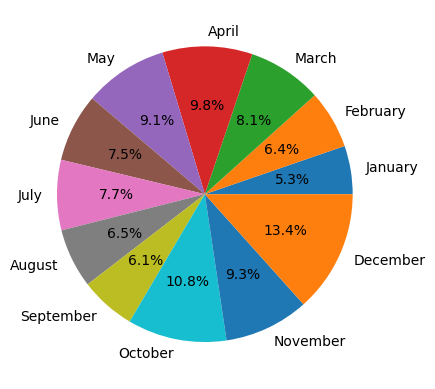

In [134]:

plt.pie(x=mdf['total_sales'],labels=mdf["month"],autopct='%.1f%%')
plt.show()

Best Month For Sales : December,
Total Sale Value In December : 4608295.70

# Most product sold city


In [135]:
edf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,month in num,payment
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,4,11.99
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,9,8.97
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,9,700.00
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,9,379.99


In [136]:
edf['city']=edf['Purchase Address'].str.split(',',expand=True)[1]
edf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,month in num,payment,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,9,700.00,San Francisco
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,9,379.99,San Francisco


In [137]:
ndf=edf.groupby('city')['Quantity Ordered'].sum()
ndf=ndf.reset_index()
ndf

,city,Quantity Ordered
0,Atlanta,16584
1,Austin,11137
2,Boston,22494
3,Dallas,16707
4,Los Angeles,33247
5,New York City,27903
6,Portland,14037
7,San Francisco,50169
8,Seattle,16534


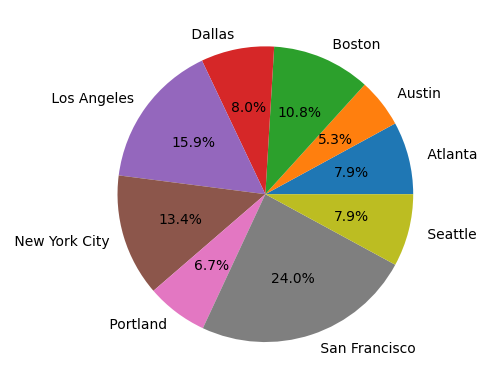

In [138]:
plt.pie(x=ndf['Quantity Ordered'],labels=ndf["city"],autopct='%.1f%%')
plt.show()

In [139]:
edf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,month in num,payment,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,9,700.00,San Francisco
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,9,379.99,San Francisco


In [140]:
edf['Hour']=edf['Order Date'].dt.hour
cdf=edf.groupby('Hour')['Quantity Ordered'].sum()
cdf=cdf.reset_index()
cdf


,Hour,Quantity Ordered
0,0,4420
1,1,2616
2,2,1397
3,3,927
4,4,935
5,5,1492
6,6,2809
7,7,4547
8,8,6998
9,9,9808


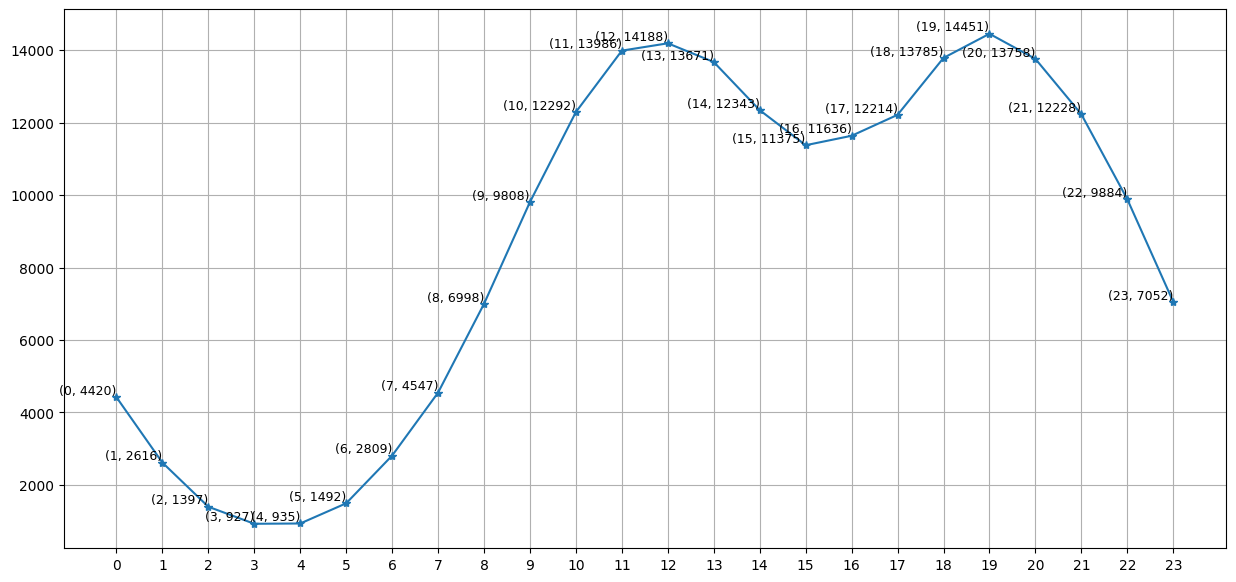

In [141]:
plt.figure(figsize=(15,7))
plt.plot(cdf['Hour'],cdf['Quantity Ordered'],marker='*')
plt.xticks(np.arange(0,24,1))
x=cdf['Hour']
y=cdf['Quantity Ordered']
for i in range(len(x)):
    plt.text(x[i] , y[i], f'{x[i] ,y[i]}',ha = 'right',va='bottom',fontdict={'fontsize':9})
plt.grid()
plt.show()


# which product sold the most

In [142]:
tdf=edf['Product'].value_counts().to_frame().reset_index()

tdf=tdf.rename(columns={'index':'count'})

tdf=tdf.head(10)
print(tdf)



                      Product  count
0        USB-C Charging Cable  21859
1    Lightning Charging Cable  21610
2      AAA Batteries (4-pack)  20612
3       AA Batteries (4-pack)  20558
4            Wired Headphones  18849
5    Apple Airpods Headphones  15525
6  Bose SoundSport Headphones  13298
7            27in FHD Monitor   7498
8                      iPhone   6840
9      27in 4K Gaming Monitor   6225


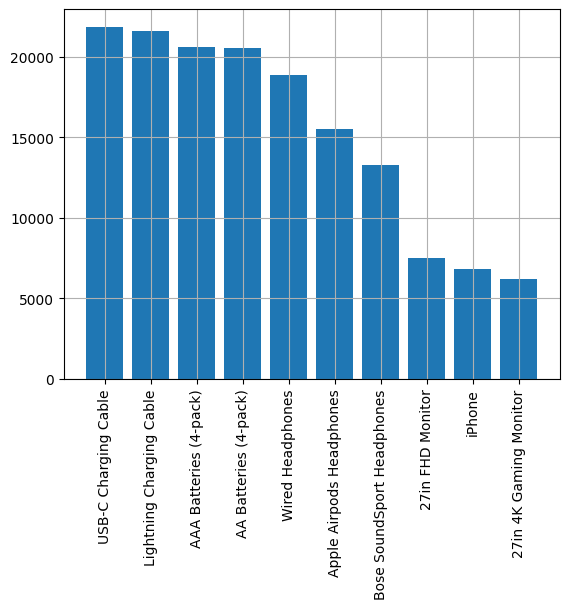

In [143]:
plt.bar(tdf['Product'],tdf['count'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

# What products are most often sold together?

In [144]:
sdf=edf.loc[edf['Order ID'].duplicated(keep=False)]

In [145]:
sdf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,month in num,payment,city,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,4,11.95,Los Angeles,19
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,4,5.98,San Francisco,17
...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",September,9,3.84,Atlanta,20
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,9,11.99,Atlanta,0
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,9,5.98,Atlanta,0
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",September,9,600.00,San Francisco,13


# Group Different Products With Same Order ID :

In [146]:
sdf['Grouped'] = sdf.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
sdf

C:\Users\anusi\AppData\Local\Temp\ipykernel_16544\1880818564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Grouped'] = sdf.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,month in num,payment,city,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,4,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",September,9,3.84,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,9,11.99,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,9,5.98,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",September,9,600.00,San Francisco,13,"Google Phone,USB-C Charging Cable"


In [147]:
sdf=sdf.loc[sdf['Order ID'].duplicated()]
sdf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,month in num,payment,city,Hour,Grouped
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,4,600.00,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",April,4,11.95,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"
130,176681,ThinkPad Laptop,1,999.99,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",April,4,999.99,Seattle,10,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...,...,...
11598,259277,Wired Headphones,2,11.99,2019-09-28 13:07:00,"795 Willow St, New York City, NY 10001",September,9,23.98,New York City,13,"iPhone,Wired Headphones"
11620,259297,Lightning Charging Cable,1,14.95,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215",September,9,14.95,Boston,18,"iPhone,Lightning Charging Cable"
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",September,9,3.84,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,9,5.98,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"


In [148]:
sdf=sdf['Grouped'].value_counts()
sdf=sdf.reset_index()
sdf=sdf.head(10)
sdf

,Grouped,count
0,"iPhone,Lightning Charging Cable",886
1,"Google Phone,USB-C Charging Cable",857
2,"iPhone,Wired Headphones",361
3,"Vareebadd Phone,USB-C Charging Cable",312
4,"Google Phone,Wired Headphones",303
5,"iPhone,Apple Airpods Headphones",286
6,"Google Phone,Bose SoundSport Headphones",161
7,"Google Phone,USB-C Charging Cable,Wired Headph...",158
8,"iPhone,Lightning Charging Cable,Wired Headphones",112
9,"Vareebadd Phone,Wired Headphones",104


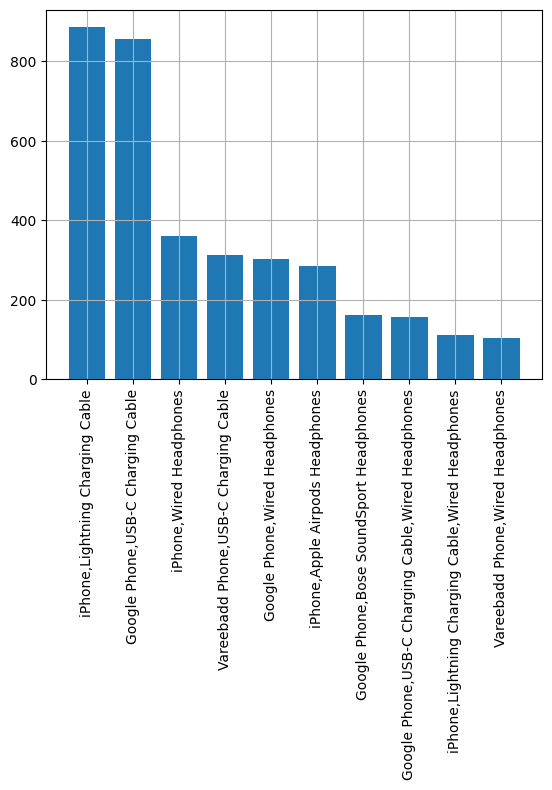

In [149]:
plt.bar(sdf['Grouped'],sdf['count'])
plt.xticks(rotation=90)
plt.grid()
plt.show()